In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
from geopy.geocoders import Nominatim

## Part 1

In [2]:
import requests

url = "https://lamadeleine.com/wp-json/wp/v2/restaurant-locations"
querystring = {"per_page": "91"}
payload = ""

headers = {
    "cookie": "__cf_bm=WVlagc3ovuDmdGAK.IF9qdFFQDElTNmlSCtcnyOm7IQ-1712093247-1.0.1.1-LT8fRlte0Mo4FGeiwh8oF4ME_rDntLmjND3dJDKfhJUFqZ3KQWr1B.yQpahHHUOFr_KBum3OVVfuoja_qZOesA; _gcl_au=1.1.1442665791.1712093248; _gid=GA1.2.1176513373.1712093248; _ga=GA1.2.2103706991.1712093248; _ga_3CV9XCRYRX=GS1.2.1712093248.1.1.1712093412.31.0.0; _ga_192BG8G1PN=GS1.2.1712093248.1.1.1712093412.0.0.0; _ga_G3C3KCQEMF=GS1.1.1712093248.1.1.1712093553.0.0.0",
    "accept": "application/json, text/plain, */*",
    "accept-language": "en-US,en;q=0.9",
    "referer": "https://lamadeleine.com/locations",
    "sec-ch-ua": '"Google Chrome";v="123", "Not:A-Brand";v="8", "Chromium";v="123"',
    "sec-ch-ua-mobile": "?0",
    "sec-ch-ua-platform": '"macOS"',
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors",
    "sec-fetch-site": "same-origin",
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/123.0.0.0 Safari/537.36"
}

response = requests.request("GET", url, data=payload, headers=headers, params=querystring)

print(response.text)


[{"id":6211,"date":"2023-11-07T21:24:33","date_gmt":"2023-11-07T21:24:33","guid":{"rendered":"https:\/\/lamadeleine.com\/?post_type=restaurant_locations&#038;p=6211"},"modified":"2024-03-27T15:03:52","modified_gmt":"2024-03-27T15:03:52","slug":"gates-of-prosper","status":"publish","type":"restaurant_locations","link":"https:\/\/lamadeleine.com\/locations\/gates-of-prosper","title":{"rendered":"Gates of Prosper"},"template":"","meta":{"_acf_changed":false},"location-features":[],"acf":{"helloBar":[4557],"locationHero":{"id":"35263","storeName":"Gates of Prosper","addressLine1":"1140 S Preston Rd","addressLine2":"Ste 10","city":"Prosper","state":"Texas","zip":"75078","lat":"33.2237329","lng":"-96.7995171","phone":"945-207-1286","hoursOfOperation":[{"day":"Sunday","openingTime":"7:00am","closingTime":"9:00pm"},{"day":"Monday","openingTime":"7:00am","closingTime":"9:00pm"},{"day":"Tuesday","openingTime":"7:00am","closingTime":"9:00pm"},{"day":"Wednesday","openingTime":"7:00am","closingTime

In [3]:
if response.status_code == 200:
    json_response = response.json()

    if 'acf' in json_response[0] and 'id' in json_response[0]:
        locations_data = []
        for location in json_response:
            acf = location['acf']
            location_name = acf['locationHero']['storeName']
            street_address = acf['locationHero']['addressLine1'] + ' ' + acf['locationHero']['addressLine2']
            city = acf['locationHero']['city']
            state = acf['locationHero']['state']
            postal_code = acf['locationHero']['zip']
            phone_number = acf['locationHero']['phone']
            store_id = location['id']

            locations_data.append({
                'locationName': location_name,
                'streetAddress': street_address,
                'city': city,
                'state': state,
                'postalCode': postal_code,
                'phoneNumber': phone_number,
                'storeID': store_id
            })



        # Create a DataFrame from the extracted data
        locations_df = pd.DataFrame(locations_data)

In [4]:
locations_df

,locationName,streetAddress,city,state,postalCode,phoneNumber,storeID
0,Gates of Prosper,1140 S Preston Rd Ste 10,Prosper,Texas,75078,945-207-1286,6211
1,Berkshire,6109 Berkshire Ln Ste A,Dallas,Texas,75225,945-279-0912,6206
2,Conroe,247 S Loop 336 W Ste 700,Conroe,Texas,77304,936-444-4601,6008
3,Lake Jackson,401-A This Way,Lake Jackson,TX,77566,979-480-1223,5798
4,Montfort,15125 Montfort Road,Dallas,TX,75254,469-885-8080,5176
...,...,...,...,...,...,...,...
86,Pearland,11200 Broadway Street Suite 1600,Pearland,TX,77584,832-916-3598,1721
87,Perkins Rowe,7707 Bluebonnet Boulevard Suite 190,Baton Rouge,LA,70810,225-766-1875,1723
88,West Grand,23322 Mercantile Parkway,Katy,TX,77449,281-395-2888,1752
89,Woodlands,9595 Six Pines Drive Suite 100,The Woodlands,TX,77380,281-419-5826,1753


In [14]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
locations_df.to_csv('lamadeleine_location_data1.csv')
local_path = "/content/drive/MyDrive/Bain"
#locations_df.to_csv(local_path, index=False)

## Part 2

In [17]:
google_review = pd.read_csv('/content/drive/MyDrive/Bain/technicalAssessment-GoogleReviews.csv')

In [18]:
google_review.head()

,name,storeID,fullAddress,phone,website,overallRating,numberReviews,reviewer,reviewRating,reviewText,reviewDate
0,la Madeleine,6206,"6109 Berkshire Ln Ste A, Dallas, TX 75225",(945) 279-0912,https://lamadeleine.com/locations/berkshire,3.1,12,Olga Garcia,2,How do you have 3 people working a lunch shift...,2024-03-05T19:11:20.386Z
1,la Madeleine,6206,"6109 Berkshire Ln Ste A, Dallas, TX 75225",(945) 279-0912,https://lamadeleine.com/locations/berkshire,3.1,12,Melissa Trevino,1,Just be aware of being double charged during t...,2024-03-05T19:11:20.386Z
2,la Madeleine,6206,"6109 Berkshire Ln Ste A, Dallas, TX 75225",(945) 279-0912,https://lamadeleine.com/locations/berkshire,3.1,12,Roger Stierman,5,"Always delicious,new crew being trainedFood: 5...",2024-02-27T19:11:20.386Z
3,la Madeleine,6206,"6109 Berkshire Ln Ste A, Dallas, TX 75225",(945) 279-0912,https://lamadeleine.com/locations/berkshire,3.1,12,Eric Brown,5,Very clean and nice location with friendly peo...,2024-02-27T19:11:20.387Z
4,la Madeleine,6206,"6109 Berkshire Ln Ste A, Dallas, TX 75225",(945) 279-0912,https://lamadeleine.com/locations/berkshire,3.1,12,AJ D.,2,It’s not even busy so I can’t BELIEVE how long...,2024-02-19T00:00:00.000Z


In [19]:
if response.status_code == 200:
    json_response = response.json()

    if 'acf' in json_response[0] and 'id' in json_response[0]:
        locations_data = []
        for location in json_response:
            acf = location['acf']
            location_name = acf['locationHero']['storeName']
            street_address = acf['locationHero']['addressLine1'] + ' ' + acf['locationHero']['addressLine2']
            city = acf['locationHero']['city']
            state = acf['locationHero']['state']
            postal_code = acf['locationHero']['zip']
            latitude = acf['locationHero']['lat']
            longitude = acf['locationHero']['lng']
            store_id = location['id']

            locations_data.append({
                'locationName': location_name,
                'streetAddress': street_address,
                'city': city,
                'state': state,
                'postalCode': postal_code,
                'latitude': latitude,
                'longitude': longitude,
                'storeID': store_id
            })



        # Create a DataFrame from the extracted data
        geo_df = pd.DataFrame(locations_data)

In [21]:
geo_df

,locationName,streetAddress,city,state,postalCode,latitude,longitude,storeID
0,Gates of Prosper,1140 S Preston Rd Ste 10,Prosper,Texas,75078,33.2237329,-96.7995171,6211
1,Berkshire,6109 Berkshire Ln Ste A,Dallas,Texas,75225,32.8650085,-96.8060218,6206
2,Conroe,247 S Loop 336 W Ste 700,Conroe,Texas,77304,30.278099,-95.461601,6008
3,Lake Jackson,401-A This Way,Lake Jackson,TX,77566,29.0393388,-95.4563921,5798
4,Montfort,15125 Montfort Road,Dallas,TX,75254,32.955654,-96.818996,5176
...,...,...,...,...,...,...,...,...
86,Pearland,11200 Broadway Street Suite 1600,Pearland,TX,77584,29.5519046,-95.3943803,1721
87,Perkins Rowe,7707 Bluebonnet Boulevard Suite 190,Baton Rouge,LA,70810,30.3796417,-91.09615370000002,1723
88,West Grand,23322 Mercantile Parkway,Katy,TX,77449,29.79027159999999,-95.7756095,1752
89,Woodlands,9595 Six Pines Drive Suite 100,The Woodlands,TX,77380,30.1643351,-95.4615408,1753


In [22]:
merged_df = pd.merge(google_review, geo_df, on='storeID', how='left')merged_df

,name,storeID,fullAddress,phone,website,overallRating,numberReviews,reviewer,reviewRating,reviewText,reviewDate,locationName,streetAddress,city,state,postalCode,latitude,longitude
0,la Madeleine,6206,"6109 Berkshire Ln Ste A, Dallas, TX 75225",(945) 279-0912,https://lamadeleine.com/locations/berkshire,3.1,12,Olga Garcia,2,How do you have 3 people working a lunch shift...,2024-03-05T19:11:20.386Z,Berkshire,6109 Berkshire Ln Ste A,Dallas,Texas,75225,32.8650085,-96.8060218
1,la Madeleine,6206,"6109 Berkshire Ln Ste A, Dallas, TX 75225",(945) 279-0912,https://lamadeleine.com/locations/berkshire,3.1,12,Melissa Trevino,1,Just be aware of being double charged during t...,2024-03-05T19:11:20.386Z,Berkshire,6109 Berkshire Ln Ste A,Dallas,Texas,75225,32.8650085,-96.8060218
2,la Madeleine,6206,"6109 Berkshire Ln Ste A, Dallas, TX 75225",(945) 279-0912,https://lamadeleine.com/locations/berkshire,3.1,12,Roger Stierman,5,"Always delicious,new crew being trainedFood: 5...",2024-02-27T19:11:20.386Z,Berkshire,6109 Berkshire Ln Ste A,Dallas,Texas,75225,32.8650085,-96.8060218
3,la Madeleine,6206,"6109 Berkshire Ln Ste A, Dallas, TX 75225",(945) 279-0912,https://lamadeleine.com/locations/berkshire,3.1,12,Eric Brown,5,Very clean and nice location with friendly peo...,2024-02-27T19:11:20.387Z,Berkshire,6109 Berkshire Ln Ste A,Dallas,Texas,75225,32.8650085,-96.8060218
4,la Madeleine,6206,"6109 Berkshire Ln Ste A, Dallas, TX 75225",(945) 279-0912,https://lamadeleine.com/locations/berkshire,3.1,12,AJ D.,2,It’s not even busy so I can’t BELIEVE how long...,2024-02-19T00:00:00.000Z,Berkshire,6109 Berkshire Ln Ste A,Dallas,Texas,75225,32.8650085,-96.8060218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66286,la Madeleine,1753,"9595 Six Pines Dr Suite 100 Ste 100, The Woodl...",(281) 419-5826,https://lamadeleine.com/locations/woodlands,4.1,886,Zuriel Morales,3,NaN,2012-03-19T00:00:00.000Z,Woodlands,9595 Six Pines Drive Suite 100,The Woodlands,TX,77380,30.1643351,-95.4615408
66287,la Madeleine,1753,"9595 Six Pines Dr Suite 100 Ste 100, The Woodl...",(281) 419-5826,https://lamadeleine.com/locations/woodlands,4.1,886,Kim Pettis,5,NaN,2012-03-19T00:00:00.000Z,Woodlands,9595 Six Pines Drive Suite 100,The Woodlands,TX,77380,30.1643351,-95.4615408
66288,la Madeleine,1753,"9595 Six Pines Dr Suite 100 Ste 100, The Woodl...",(281) 419-5826,https://lamadeleine.com/locations/woodlands,4.1,886,Chet Smith,2,HIGHLY OVERRATEDThe food was cold. There was ...,2012-03-19T00:00:00.000Z,Woodlands,9595 Six Pines Drive Suite 100,The Woodlands,TX,77380,30.1643351,-95.4615408
66289,la Madeleine,1753,"9595 Six Pines Dr Suite 100 Ste 100, The Woodl...",(281) 419-5826,https://lamadeleine.com/locations/woodlands,4.1,886,Mikey Rollins,2,Not really my style of dining. Most of the foo...,2011-03-19T00:00:00.000Z,Woodlands,9595 Six Pines Drive Suite 100,The Woodlands,TX,77380,30.1643351,-95.4615408


In [45]:
selected_columns = ['locationName', 'fullAddress', 'overallRating', 'latitude', 'longitude']
selected_merged_df = merged_df[selected_columns]

selected_merged_df = selected_merged_df.drop_duplicates(subset=['locationName'], keep='first')

selected_merged_df.to_csv('/content/drive/MyDrive/Bain/unique_merged_location_data.csv', index=False)

local_path = "/content/drive/MyDrive/Bain/unique_merged_location_data.csv"

selected_merged_df.to_csv(local_path, index=False)

In [24]:
from folium.plugins import HeatMap

def generateBaseMap(default_location=[40.75, -74.125], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

basemap = generateBaseMap()

In [35]:
basemap = folium.Map(location=[40.75, -74.125], control_scale=True, zoom_start=12)

heat_data = merged_df[['latitude', 'longitude']].dropna()
HeatMap(heat_data, radius=15).add_to(basemap)

# Add markers for each location with popup showing location name and overall rating
for idx, row in merged_df.iterrows():
    popup_text = f"{row['locationName']}: Overall Rating - {row['overallRating']}"
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(basemap)


basemap.save("reviews_heatmap_with_markers.html")

basemap.save("reviews_heatmap.html")


In [36]:
basemap

KeyboardInterrupt: 

<ipython-input-48-1b9e979866c4>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='overallRating', y='locationName', data=avg_ratings, palette='Oranges')


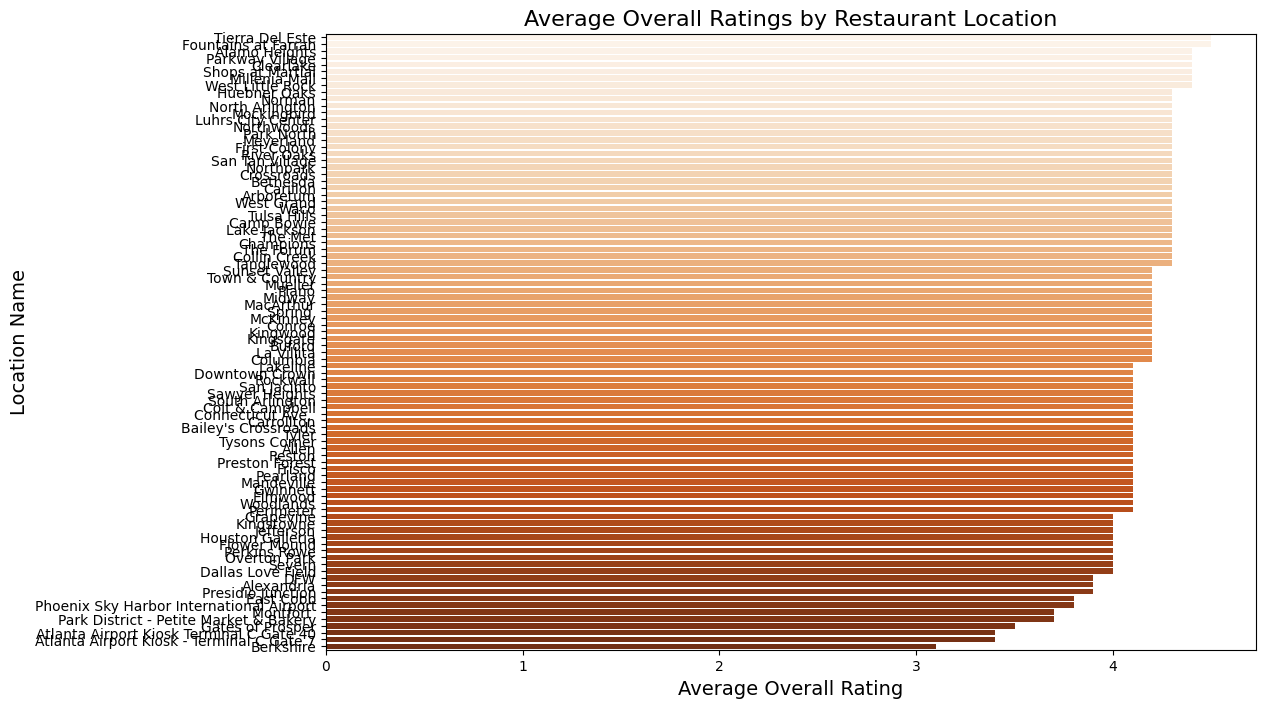

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average ratings by location
avg_ratings = selected_merged_df.groupby('locationName')['overallRating'].mean().reset_index()

# Sort the data by average ratings for better visualization
avg_ratings = avg_ratings.sort_values(by='overallRating', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='overallRating', y='locationName', data=avg_ratings, palette='Oranges')

plt.title('Average Overall Ratings by Restaurant Location', fontsize=16)
plt.xlabel('Average Overall Rating', fontsize=14)
plt.ylabel('Location Name', fontsize=14)

plt.show()


<ipython-input-52-cbc62377fc92>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='overallRating', y='locationName', data=avg_ratings_top_n, palette='Oranges')


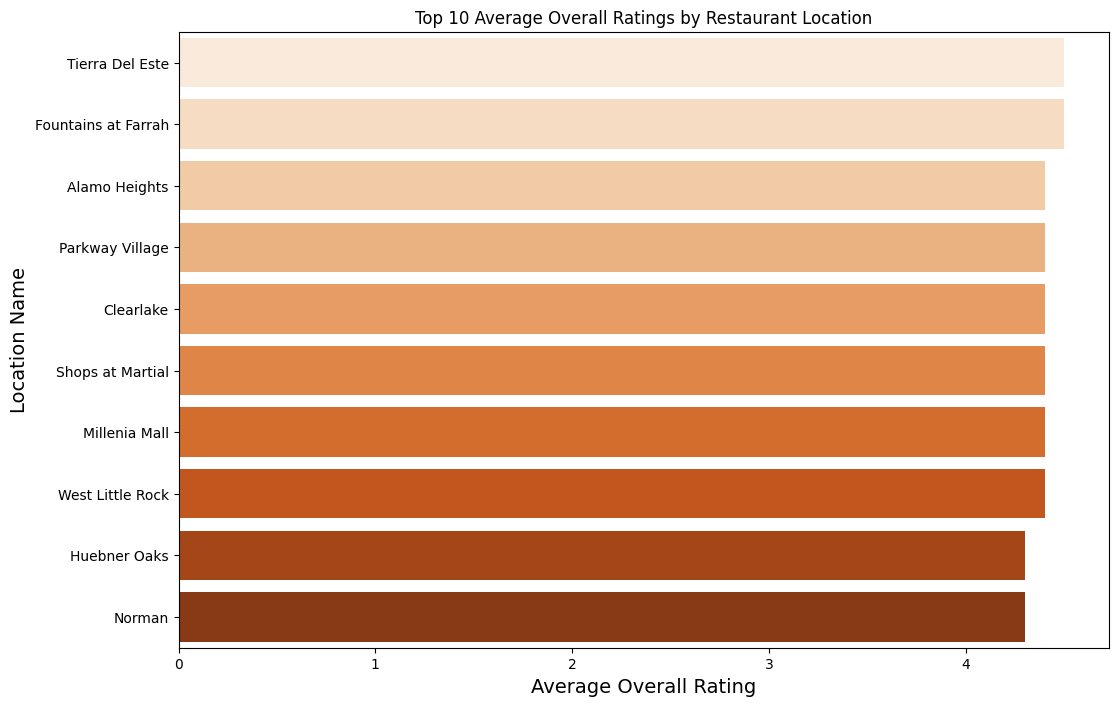

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average ratings by location
avg_ratings = selected_merged_df.groupby('locationName')['overallRating'].mean().reset_index()

# Sort the data by average ratings for better visualization
avg_ratings = avg_ratings.sort_values(by='overallRating', ascending=False)

# Select top 10 locations
top_n = 10
avg_ratings_top_n = avg_ratings.head(top_n)

# Create the horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='overallRating', y='locationName', data=avg_ratings_top_n, palette='Oranges')

plt.title(f'Top {top_n} Average Overall Ratings by Restaurant Location', fontsize=12)
plt.xlabel('Average Overall Rating', fontsize=14)
plt.ylabel('Location Name', fontsize=14)

plt.show()


<ipython-input-51-1b65adcc4253>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='overallRating', y='locationName', data=avg_ratings_bottom_n, palette='Oranges')


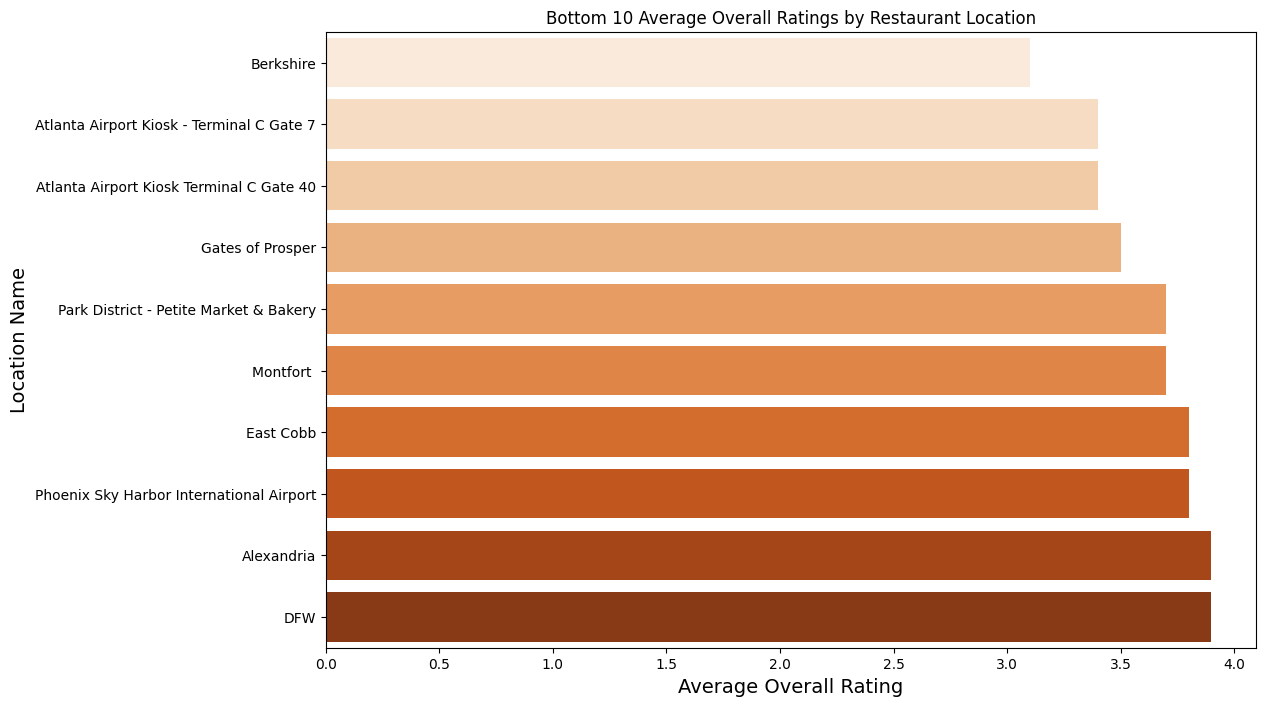

In [51]:
avg_ratings = selected_merged_df.groupby('locationName')['overallRating'].mean().reset_index()

# Sort the data by average ratings for better visualization
avg_ratings = avg_ratings.sort_values(by='overallRating', ascending=True)

# Select bottom 10 locations
bottom_n = 10
avg_ratings_bottom_n = avg_ratings.head(bottom_n)

plt.figure(figsize=(12, 8))
sns.barplot(x='overallRating', y='locationName', data=avg_ratings_bottom_n, palette='Oranges')

plt.title(f'Bottom {bottom_n} Average Overall Ratings by Restaurant Location', fontsize=12)
plt.xlabel('Average Overall Rating', fontsize=14)
plt.ylabel('Location Name', fontsize=14)

plt.show()


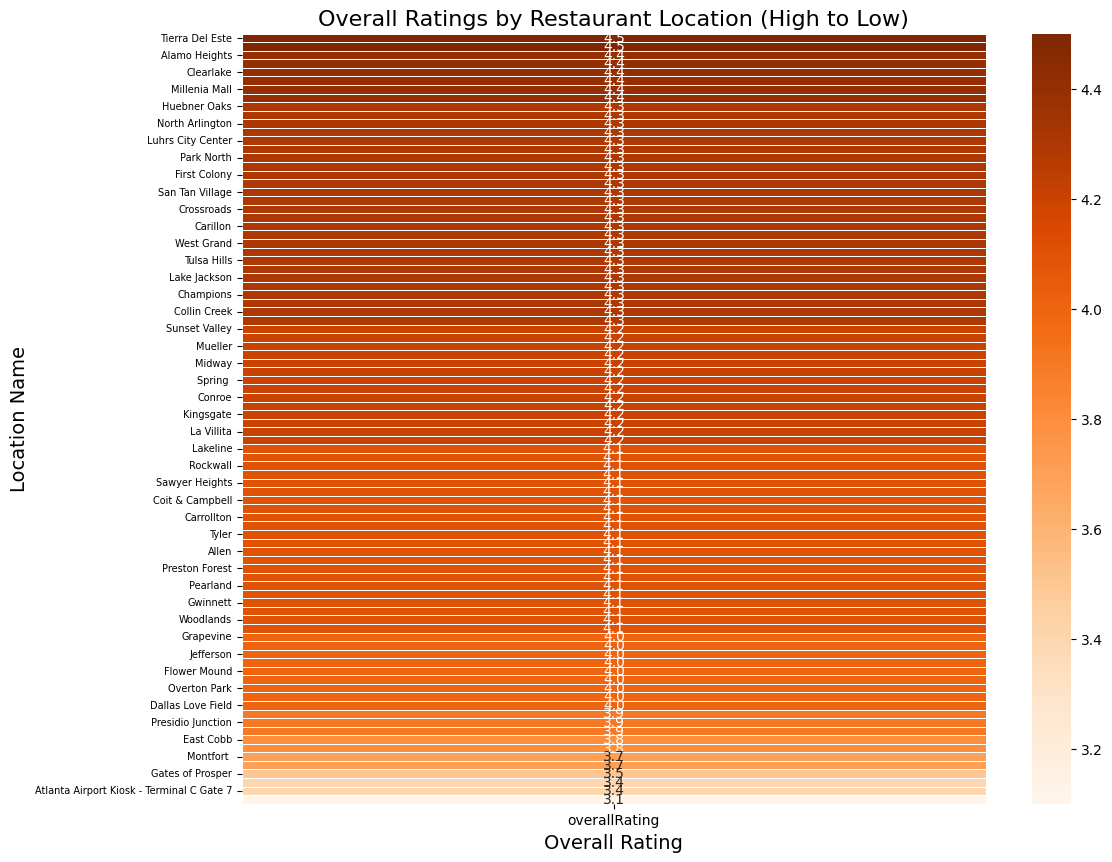

In [60]:
# Create a pivot table with locationName as index and overallRating as values
heatmap_data = merged_df.pivot_table(values='overallRating', index='locationName', aggfunc='mean')

# Sort the data by average overallRating in descending order
heatmap_data = heatmap_data.sort_values(by='overallRating', ascending=False)

# Create the heatmap with adjusted figure size and font size
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, cmap='Oranges', annot=True, fmt=".1f", linewidths=.5)


plt.xticks(fontsize=10)
plt.yticks(fontsize=7)

# Set plot titles and labels
plt.title('Overall Ratings by Restaurant Location (High to Low)', fontsize=16)
plt.xlabel('Overall Rating', fontsize=14)
plt.ylabel('Location Name', fontsize=14)

plt.show()
